## **Дослідження Операцій (Песчихін Лев КМ-11)**

Імпортуємо потрібні бібліотеки та додаємо колонку "miners-revenue" до таблиці з цінами на Біткоїн:


In [ ]:
import json
import csv
import pandas as pd

f = open('/content/NORKIN/miners-revenue.json')
data = json.load(f)
f.close()

maindf = pd.read_csv('/content/NORKIN/BTC-USD.csv')

miners_revenue_list = [int(i['y']) for i in data['miners-revenue']]
maindf['MinersRevenue'] = miners_revenue_list


Робимо огляд та перевірку даних:

In [ ]:
# maindf.head()
# maindf.info()
# maindf.describe()
# maindf.isnull().values.any()
# maindf.shape

In [ ]:
print(maindf)
print(f"Перша дата: {maindf.loc[0][0]}")
print(f"Остання дата: {maindf.iloc[-1][0]}")

           Date          Open          High           Low         Close  \
0    2020-12-21  23474.455078  24059.982422  22159.367188  22803.082031   
1    2020-12-22  22794.039063  23789.902344  22430.605469  23783.029297   
2    2020-12-23  23781.974609  24024.490234  22802.646484  23241.345703   
3    2020-12-24  23240.203125  23768.337891  22777.597656  23735.949219   
4    2020-12-25  23733.570313  24710.101563  23463.673828  24664.791016   
...         ...           ...           ...           ...           ...   
1089 2023-12-15  43028.250000  43087.824219  41692.968750  41929.757813   
1090 2023-12-16  41937.742188  42664.945313  41723.113281  42240.117188   
1091 2023-12-17  42236.109375  42359.496094  41274.542969  41364.664063   
1092 2023-12-18  41348.203125  42720.296875  40530.257813  42623.539063   
1093 2023-12-19  42641.511719  43354.296875  41826.335938  42270.527344   

         Adj Close       Volume  MinersRevenue  
0     22803.082031  45852713981       23298120  
1

In [ ]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2021 = maindf.loc[(maindf['Date'] >= '2021-01-01')
                     & (maindf['Date'] <= '2021-12-31')]

y_overall = maindf.loc[(maindf['Date'] >= '2020-12-21')
                     & (maindf['Date'] <= '2023-12-19')]

y_2021.drop(y_overall[['Adj Close','Volume', 'MinersRevenue']],axis=1)
y_overall.drop(y_overall[['Adj Close','Volume', 'MinersRevenue']],axis=1)

,Date,Open,High,Low,Close
0,2020-12-21,23474.455078,24059.982422,22159.367188,22803.082031
1,2020-12-22,22794.039063,23789.902344,22430.605469,23783.029297
2,2020-12-23,23781.974609,24024.490234,22802.646484,23241.345703
3,2020-12-24,23240.203125,23768.337891,22777.597656,23735.949219
4,2020-12-25,23733.570313,24710.101563,23463.673828,24664.791016
...,...,...,...,...,...
1089,2023-12-15,43028.250000,43087.824219,41692.968750,41929.757813
1090,2023-12-16,41937.742188,42664.945313,41723.113281,42240.117188
1091,2023-12-17,42236.109375,42359.496094,41274.542969,41364.664063
1092,2023-12-18,41348.203125,42720.296875,40530.257813,42623.539063


In [ ]:
import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

fig = px.line(y_2021, x=y_2021.Date, y=[y_2021['Open'], y_2021['Close'],
                                          y_2021['High'], y_2021['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')

fig.show()

In [ ]:
fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'],
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')

fig.show()

In [ ]:
monthvise = y_2021.groupby(y_2021['Date'].dt.strftime('%B')).agg({'Open': 'first', 'Close': 'last'})

new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise Comparison Between Stock Open and Close Prices')
fig.show()

In [ ]:
closedf = maindf[['Date','Close']]
closedf = maindf[['Date','Close',]]
print("Shape of the dataframe:", closedf.shape)

Shape of the dataframe: (1094, 2)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

del closedf['Date']
scaler = MinMaxScaler(feature_range=(0,1))
closedf = scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(1094, 1)


In [ ]:
training_size = int(len(closedf)*0.60)
test_size = len(closedf) - training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (656, 1)
test_data:  (438, 1)


In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (640, 15)
y_train:  (640,)
X_test:  (422, 15)
y_test (422,)


In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (640, 15, 1)
X_test:  (422, 15, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(LSTM(10,input_shape=(None,1),activation="relu"))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
train = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
20/20 [==============================] - 3s 43ms/step - loss: 0.3381 - val_loss: 0.0412
Epoch 2/200
20/20 [==============================] - 0s 18ms/step - loss: 0.1923 - val_loss: 0.0117
Epoch 3/200
20/20 [==============================] - 0s 23ms/step - loss: 0.0463 - val_loss: 0.0243
Epoch 4/200
20/20 [==============================] - 0s 13ms/step - loss: 0.0158 - val_loss: 0.0165
Epoch 5/200
20/20 [==============================] - 0s 12ms/step - loss: 0.0121 - val_loss: 0.0162
Epoch 6/200
20/20 [==============================] - 0s 13ms/step - loss: 0.0105 - val_loss: 0.0124
Epoch 7/200
20/20 [==============================] - 0s 13ms/step - loss: 0.0096 - val_loss: 0.0104
Epoch 8/200
20/20 [==============================] - 0s 13ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 9/200
20/20 [==============================] - 0s 17ms/step - loss: 0.0085 - val_loss: 0.0072
Epoch 10/200
20/20 [==============================] - 0s 13ms/step - loss: 0.0083 - val_loss: 0.0069

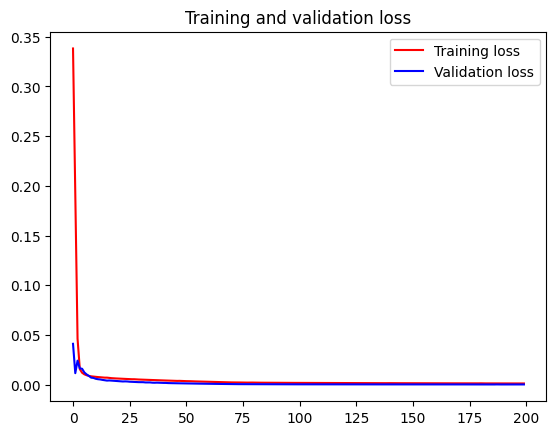

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

loss = train.history['loss']
val_loss = train.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

14/14 [==============================] - 1s 14ms/step


((640, 1), (422, 1))

In [ ]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  1900.6375053889078
Train data MSE:  3612422.9268909707
Train data MAE:  1426.592248528516
-------------------------------------------------------------------------------------
Test data RMSE:  988.7013014153096
Test data MSE:  977530.2634203268
Test data MAE:  776.9598498394549


In [ ]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9771735643158977
Test data R2 score: 0.9754415282160104


In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


In [ ]:
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': maindf['Date'],
                       'original_close': maindf['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (1094, 1)
Test predicted data:  (1094, 1)


In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()